# **The Goal:** 
The goal of this project is to develop a machine learning-based diet recommendation system that provides personalized meal plans by analyzing key health-related inputs. Instead of analyzing full dietary patterns, the system focuses on essential factors that directly influence nutrition.

Specifically, this project aims to:
 1. Classify users into suitable diet categories based on their age, BMI, calorie needs, gender, health condition, and activity level.
 2. Provide personalized diet recommendations that align with each user’s health status and nutritional needs.
 3. Improve accessibility to dietary guidance through an AI-driven system that simplifies the meal planning process.
 4. Promote healthier eating habits by offering practical and customized nutritional advice.

By utilizing machine learning, this system ensures that users receive accurate and relevant diet suggestions without requiring extensive dietary history analysis.
# **The source of the dataset:** 
https://www.kaggle.com/datasets/ziya07/diet-recommendations-dataset

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

In [128]:
# Load the dataset
dataset = pd.read_csv('diet_recommendations_dataset.csv')

# **General information:**


In [129]:
num_rows, num_columns = dataset.shape
data_types = dataset.dtypes
summary_info = dataset.info()

# Display extracted information
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")
print("\nColumn Data Types:")
print(data_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        1000 non-null   object 
 1   Age                               1000 non-null   int64  
 2   Gender                            1000 non-null   object 
 3   Weight_kg                         1000 non-null   float64
 4   Height_cm                         1000 non-null   int64  
 5   BMI                               1000 non-null   float64
 6   Disease_Type                      796 non-null    object 
 7   Severity                          1000 non-null   object 
 8   Physical_Activity_Level           1000 non-null   object 
 9   Daily_Caloric_Intake              1000 non-null   int64  
 10  Cholesterol_mg/dL                 1000 non-null   float64
 11  Blood_Pressure_mmHg               1000 non-null   int64  
 12  Glucose

In [130]:
print("Classes:", dataset["Diet_Recommendation"].unique()) # Display unique diet recommendations (classes)

print("Class distribution:\n", dataset["Diet_Recommendation"].value_counts()) # Display the count of each class

Classes: ['Balanced' 'Low_Carb' 'Low_Sodium']
Class distribution:
 Diet_Recommendation
Balanced      426
Low_Sodium    316
Low_Carb      258
Name: count, dtype: int64


# **Summary of the dataset:**

In [131]:
display(dataset.head(10)) #to provide sample of the dataset (first 10 record)

Patient_ID  Age  Gender  Weight_kg  Height_cm   BMI  Disease_Type  Severity  \
0      P0001   56    Male       58.4        160  22.8       Obesity  Moderate   
1      P0002   69    Male      101.2        169  35.4      Diabetes      Mild   
2      P0003   46  Female       63.5        173  21.2  Hypertension      Mild   
3      P0004   32    Male       58.1        164  21.6           NaN      Mild   
4      P0005   60    Male       79.5        197  20.5      Diabetes  Moderate   
5      P0006   25  Female      105.7        156  43.4       Obesity    Severe   
6      P0007   78    Male      102.2        170  35.4           NaN      Mild   
7      P0008   38    Male       53.8        191  14.7      Diabetes    Severe   
8      P0009   56    Male       81.9        175  26.7       Obesity    Severe   
9      P0010   75    Male       86.6        193  23.2  Hypertension  Moderate   

  Physical_Activity_Level  Daily_Caloric_Intake  Cholesterol_mg/dL  \
0                Moderate                  3079              173.3   
1                Moderate                  3032              199.2   
2               Sedentary                  1737              181.0   
3                Moderate                  2657              168.2   
4               Sedentary                  3496              200.4   
5                  Active                  2715              182.3   
6                  Active                  2879              175.8   
7                Moderate                  1777              196.4   
8                  Active                  2541              163.3   
9                  Active                  2023              242.8   

   Blood_Pressure_mmHg  Glucose_mg/dL Dietary_Restrictions Allergies  \
0                  133          116.3                  NaN   Peanuts   
1                  120          137.1                  NaN   Peanuts   
2                  121          109.6                  NaN   Peanuts   
3                  144          159.4                  NaN       NaN   
4                  172          182.3            Low_Sugar       NaN   
5                  177          108.9                  NaN    Gluten   
6                  166           95.1                  NaN    Gluten   
7                  122           85.1           Low_Sodium    Gluten   
8                  132          150.1                  NaN       NaN   
9                  148          127.7           Low_Sodium       NaN   

  Preferred_Cuisine  Weekly_Exercise_Hours  Adherence_to_Diet_Plan  \
0           Mexican                    3.1                    96.6   
1           Chinese                    4.5                    63.2   
2           Chinese                    3.8                    57.5   
3           Mexican                    4.3                    54.5   
4           Italian                    9.8                    78.2   
5            Indian                    0.9                    55.7   
6           Chinese                    9.2                    56.9   
7           Italian                    4.8                    65.0   
8            Indian                    6.2                    64.1   
9            Indian                    8.3                    80.2   

   Dietary_Nutrient_Imbalance_Score Diet_Recommendation  
0                               3.1            Balanced  
1                               0.6            Low_Carb  
2                               4.6          Low_Sodium  
3                               0.4            Balanced  
4                               4.7            Low_Carb  
5                               3.5            Balanced  
6                               1.6            Balanced  
7                               2.0            Low_Carb  
8                               3.7            Balanced  
9                               3.0          Low_Sodium

## Summary statistics for numerical columns

In [132]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Data:")
print(dataset.describe())


Summary Statistics for Numerical Data:
               Age    Weight_kg   Height_cm          BMI  \
count  1000.000000  1000.000000  1000.00000  1000.000000   
mean     49.857000    84.602400   174.81700    28.191600   
std      18.114267    20.088121    14.33377     8.040136   
min      18.000000    50.000000   150.00000    13.000000   
25%      35.000000    66.600000   162.00000    22.075000   
50%      50.000000    85.200000   175.00000    27.450000   
75%      66.000000   102.000000   187.00000    33.425000   
max      79.000000   119.700000   199.00000    52.400000   

       Daily_Caloric_Intake  Cholesterol_mg/dL  Blood_Pressure_mmHg  \
count           1000.000000        1000.000000          1000.000000   
mean            2475.064000         199.717900           144.993000   
std              565.017032          29.080614            20.245712   
min             1500.000000         150.400000           110.000000   
25%             1984.750000         174.300000           128.000

## Gender distribution:

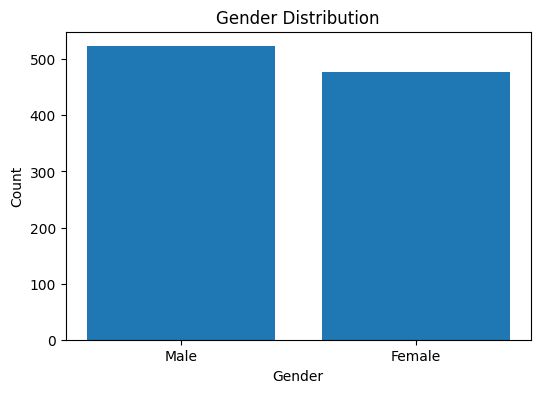

In [133]:
gender_counts = dataset['Gender'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

## Disease types Distribution

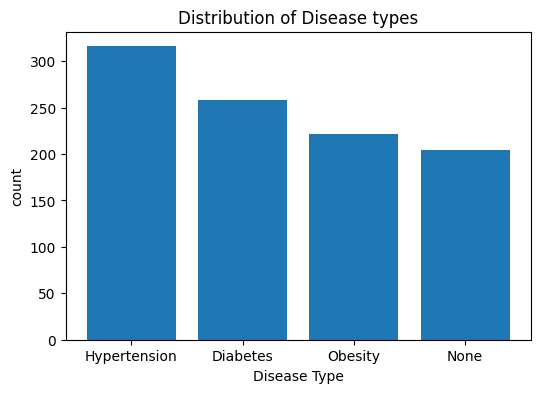

In [134]:
Disease_counts = dataset['Disease_Type'].value_counts(dropna=False)
Disease_counts.index = Disease_counts.index.fillna('None')
plt.figure(figsize=(6, 4))
plt.bar(Disease_counts.index, Disease_counts.values)
plt.xlabel('Disease Type')
plt.ylabel('count')
plt.title('Distribution of Disease types')
plt.show()

## Age distribution

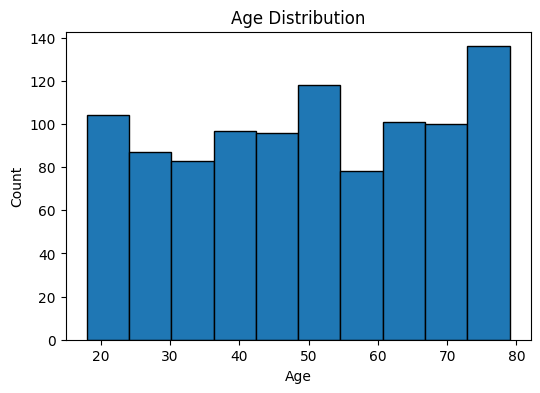

In [135]:
plt.figure(figsize=(6, 4))
plt.hist(dataset['Age'], bins=10 , edgecolor='black') 
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

## BMI Distribution 

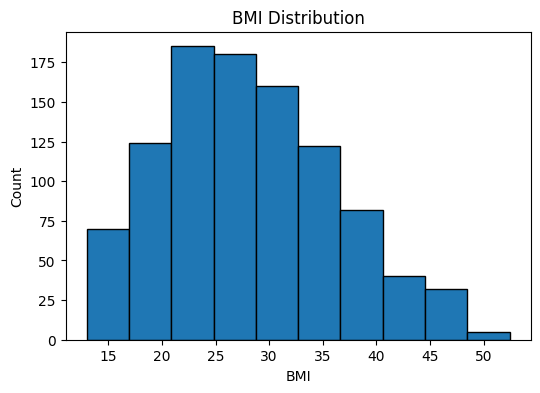

In [136]:
plt.figure(figsize=(6, 4))
plt.hist(dataset['BMI'], bins=10,  edgecolor='black') 
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')
plt.show()

## Physical Activity Level Distribution

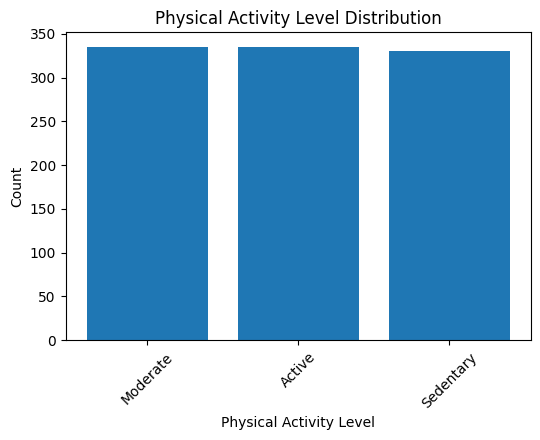

In [137]:
activity_counts = dataset['Physical_Activity_Level'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(activity_counts.index, activity_counts.values)
plt.xticks(ticks=range(len(activity_counts.index)), labels=activity_counts.index, rotation=45)
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.title('Physical Activity Level Distribution')
plt.show()

## Diet Recommendation Distribution

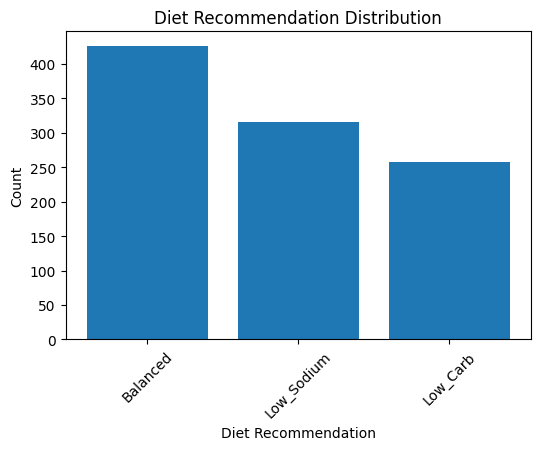

In [138]:
diet_counts = dataset['Diet_Recommendation'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(diet_counts.index, diet_counts.values)
plt.xticks(ticks=range(len(diet_counts.index)), labels=diet_counts.index, rotation=45)
plt.xlabel('Diet Recommendation')
plt.ylabel('Count')
plt.title('Diet Recommendation Distribution')
plt.show()

# **Preprocessing techniques:**

# **Binning:** 
Binning is the process of converting continuous numerical values into discrete categories (ranges). 

Binning simplifies data by grouping similar values together, reducing the complexity of continuous variables like age, BMI, and daily caloric intake. This helps in minimizing noise by generalizing values into broader categories, making patterns more apparent. Additionally, it enhances interpretability, as many machine learning models and analytical approaches perform better with categorical data rather than raw numerical values.

## Binning Age

In [139]:
bins = list(range(10, 81, 10))  
labels = [f"{i}-{i+10}" for i in bins[:-1]]  # Labels like "10-20", "20-30"

dataset['Age_Range'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

## Binning BMI

In [140]:
bmi_bins = list(range(0, 71, 10))  # [0,10,20,...,70]
bmi_labels = [f"{i}-{i+10}" for i in range(0, 70, 10)]  # Adjust labels count
dataset["BMI_Range"] = pd.cut(dataset["BMI"], bins=bmi_bins, labels=bmi_labels, right=False)

## Binning Daily Caloric Intake

In [141]:
calorie_bins = list(range(0, 6001, 1000))  # [0,1000,2000,...,6000]
calorie_labels = [f"{i}-{i+1000}" for i in range(0, 6000, 1000)]
dataset["Calorie_Range"] = pd.cut(dataset["Daily_Caloric_Intake"], bins=calorie_bins, labels=calorie_labels, right=False)

# Drop some culomns

In the provided code, specific columns are dropped to streamline the dataset by removing irrelevant, redundant, or noisy features that could hinder model performance. The **Patient_ID** column is dropped as it is an identifier and does not contribute meaningful information. The **Age** column is removed after applying binning to group ages into meaningful categories. **Weight_kg and Height_cm** are excluded since they are used to calculate **BMI**, and only the binned BMI values are retained to simplify the inputs. The remaining columns, such as **Daily_Caloric_Intake, Cholesterol_mg/dL, Blood_Pressure_mmHg, Glucose_mg/dL, Dietary_Restrictions, Allergies, Preferred_Cuisine, Weekly_Exercise_Hours, Adherence_to_Diet_Plan, Dietary_Nutrient_Imbalance_Score**, were determined to either add noise or lack direct relevance to the dataset’s objectives. This process ensures the dataset remains focused and efficient for analysis.

In [142]:
dataset = dataset.drop(columns=["Patient_ID", "Age", "Weight_kg", "Height_cm", "BMI", "Severity", "Daily_Caloric_Intake", "Cholesterol_mg/dL", "Blood_Pressure_mmHg", "Glucose_mg/dL", "Dietary_Restrictions", "Allergies", "Preferred_Cuisine", "Weekly_Exercise_Hours", "Adherence_to_Diet_Plan", "Dietary_Nutrient_Imbalance_Score"])

# Encode categorical

Encoding categorical data refers to the process of converting categorical variables into numerical formats so they can be used in machine learning models, which typically require numerical inputs. This transformation is crucial for improving model interpretability, ensuring compatibility with mathematical operations, and enhancing computational efficiency. Effective encoding methods help prevent misleading relationships, reduce dimensionality when necessary, and optimize feature representation for better predictive performance. Selecting the right encoding technique depends on the nature of the categorical data and the type of machine learning model being used.
## Label Encoding
Label encoding is a simple and efficient method for converting categorical variables into numerical values by assigning a unique integer to each category. It was applied to several columns in our dataset: 
**Gender was encoded as** 
0 for female and 
1 for male, 
**Disease Type as** 
0 for Diabetes,
1 for Hypertension, 
2 for Obesity, 
and 3 for none, 
**Activity Level as** 
0 for Active
1 for Moderate, 
and 2 for Sedentary, 
**Diet Recommendation as** 
0 for Balanced, 
1 for Low Carb, 
and 2 for Low Sodium. 
This approach is particularly useful as it is easy to implement, memory-efficient, and preserves relationships between categories when applicable, ensuring the categorical data is compatible with machine learning models.

In [143]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encoding categorical columns
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Disease_Type'] = le.fit_transform(dataset['Disease_Type'])
dataset['Physical_Activity_Level'] = le.fit_transform(dataset['Physical_Activity_Level'])
dataset['Diet_Recommendation'] = le.fit_transform(dataset['Diet_Recommendation'])

## Ordinal Encoding


In [144]:
ordinal_features = ['Age_Range', 'BMI_Range', 'Calorie_Range']
ordinal_encoder = OrdinalEncoder()
dataset[ordinal_features] = ordinal_encoder.fit_transform(dataset[ordinal_features]).astype(int)


# Build a Supervised Learning Model (Phase2)



In [145]:
%pip install pandas scikit-learn ipywidgets


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [146]:
# Import necessary libraries
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets for model evaluation
from sklearn.ensemble import RandomForestClassifier  # Implements the Random Forest algorithm for classification tasks
from sklearn.svm import SVC # Implements Support Vector Classification (SVM), a powerful machine learning algorithm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # Provides plotting functionality for data visualization 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
# Import evaluation metrics:
# - accuracy_score: Measures the percentage of correctly classified samples.
# - classification_report: Provides precision, recall, F1-score, and support for each class.
# - confusion_matrix: Displays the number of correct and incorrect predictions for each class.


In [147]:
# Load the preproccessting dataset
csv_path = "dataset_preprocessed (3).csv"  
df = pd.read_csv(csv_path)

# Define feature columns and target column
feature_cols = ['Gender', 'Disease_Type', 'Physical_Activity_Level', 'Age_Range', 'BMI_Range', 'Calorie_Range']
target_col = 'Diet_Recommendation'

# Select features and target
X = df[feature_cols]  
y = df[target_col]  


# Split the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=1, stratify=y
)




🔹 Random Forest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       0.78      0.94      0.85        52
           2       0.94      0.78      0.85        63

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.92      0.92      0.91       200

Accuracy: 0.9150


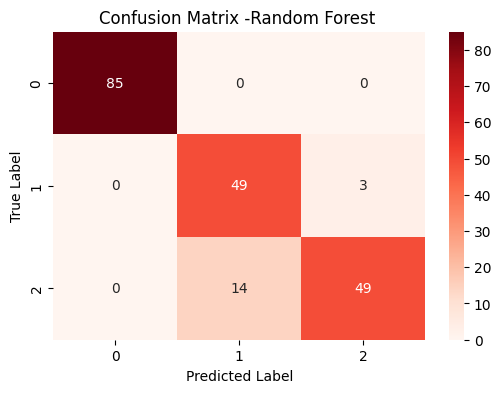


🔹 SVM Model Performance (Without Scaling):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      0.90      0.95        52
           2       0.93      1.00      0.96        63

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Accuracy: 0.9750


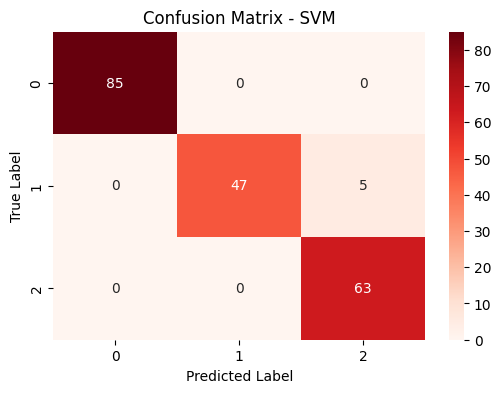


🔹 Model Comparison:
Random Forest Accuracy: 91.50%
SVM Accuracy: 97.50%


In [148]:
  # 1.1-Apply Random Forest for Diet Recommendation

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=2,  # Number of trees in the forest (increasing this can improve learning)
    max_depth=10,  # Limits the depth of each tree to prevent overfitting
    max_leaf_nodes=10,  # Restricts the maximum number of leaf nodes for simplicity
    min_samples_split=6,  # Minimum samples required to split a node (higher values reduce overfitting)
    random_state=42  # Ensures reproducibility of results
)


# Train the Random Forest model on the training dataset
rf_classifier.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_rf = rf_classifier.predict(X_test)

#1.2-Evaluate Random Forest Model Performance
print("\n🔹 Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))  #classification_report: Provides precision, recall, F1-score, and support for each class.
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")  # # accuracy_score: Measures the percentage of correctly classified samples.

# 1.3-Generate Confusion Matrix for SVM(confusion_matrix: Displays the number of correct and incorrect predictions for each class.)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Reds", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix -Random Forest ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##################################################################################

 #2.1-Apply Support Vector Machine( SVM )for Diet Recommendation


# Initialize the SVM Classifier

svm_model = SVC(
    kernel='rbf',  # RBF kernel
    C=0.07,  # Slightly increased C for better classification
    gamma="auto",  # Adjust gamma for a more flexible decision boundary
    random_state=42
)

# Train SVM 
svm_model.fit(X_train, y_train)  # Train on raw (unscaled) data
y_pred_svm = svm_model.predict(X_test)  # Predict on raw (unscaled) test data


# 2.2-Evaluate SVM Model Performance
print("\n🔹 SVM Model Performance (Without Scaling):")
print(classification_report(y_test, y_pred_svm)) # classification_report: Provides precision, recall, F1-score, and support for each class.
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}") # accuracy_score: Measures the percentage of correctly classified samples.


# 2.3-Generate Confusion Matrix for SVM ( confusion_matrix: Displays the number of correct and incorrect predictions for each class.)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Reds", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



# 3-Compare Both Models


rf_accuracy = accuracy_score(y_test, y_pred_rf)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print("\n🔹 Model Comparison:")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

# Unsupervised (Phase 3 )


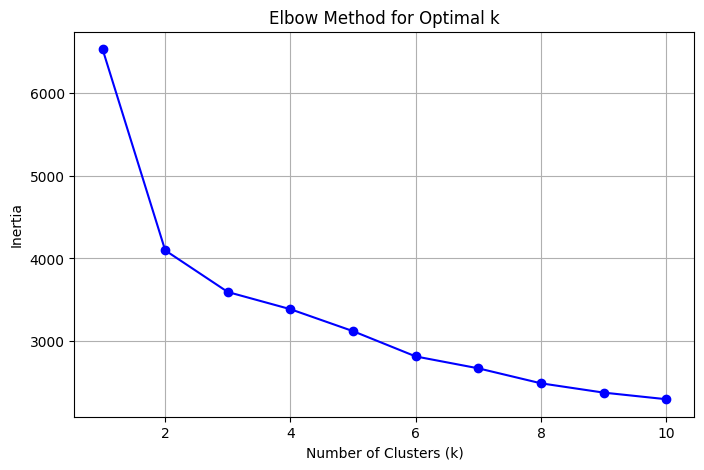

In [149]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np




# Load your dataset
df = pd.read_csv('dataset_preprocessed (3).csv')

# Drop the 'Cluster' column if it exists (from previous runs)
if 'Cluster' in df.columns:
    df = df.drop('Cluster', axis=1)

# Select features (all except Diet_Recommendation since it's the target)
features = df.drop('Diet_Recommendation', axis=1)

# Elbow Method to choose the best K
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

## Hierarchical Clustering (Agglomerative)

In [150]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply Hierarchical Clustering (Agglomerative)
# We chose 3 clusters 
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(features)


# Preview the first few rows with cluster assignments

print(" First few rows with Hierarchical cluster assignments:")
display(df[['Gender', 'Disease_Type', 'Physical_Activity_Level',
          'Age_Range', 'BMI_Range', 'Calorie_Range',
          'Diet_Recommendation', 'Hierarchical_Cluster']].head(10))

# Compare clusters with Diet Recommendations
# This shows how diet labels are distributed within each cluster

print("\n Hierarchical Cluster vs. Diet Recommendation Distribution (in %):")
Hierarchical_Cluster_summary = df.groupby('Hierarchical_Cluster')['Diet_Recommendation'].value_counts(normalize=True) * 100
print(Hierarchical_Cluster_summary.round(2))



 First few rows with Hierarchical cluster assignments:


Gender  Disease_Type  Physical_Activity_Level  Age_Range  BMI_Range  \
0       1             2                        1          4          1   
1       1             0                        1          5          2   
2       0             1                        2          3          1   
3       1             3                        1          2          1   
4       1             0                        2          5          1   
5       0             2                        0          1          3   
6       1             3                        0          6          2   
7       1             0                        1          2          0   
8       1             2                        0          4          1   
9       1             1                        0          6          1   

   Calorie_Range  Diet_Recommendation  Hierarchical_Cluster  
0              2                    0                     0  
1              2                    1                     0  
2              0                    2                     2  
3              1                    0                     1  
4              2                    1                     0  
5              1                    0                     1  
6              1                    0                     0  
7              0                    1                     1  
8              1                    0                     0  
9              1                    2                     0


 Hierarchical Cluster vs. Diet Recommendation Distribution (in %):
Hierarchical_Cluster  Diet_Recommendation
0                     0                      56.99
                      2                      25.89
                      1                      17.12
1                     0                      50.74
                      2                      27.57
                      1                      21.69
2                     1                      46.99
                      2                      46.99
                      0                       6.02
Name: proportion, dtype: float64


## Gaussian Mixture Clustering

In [151]:
#Apply Gaussian Mixture with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(scaled_features)


# Preview the first few rows with cluster assignments
print(" First few rows with Gaussian Mixture cluster assignments:")
display(df[['Gender', 'Disease_Type', 'Physical_Activity_Level',
          'Age_Range', 'BMI_Range', 'Calorie_Range',
          'Diet_Recommendation', 'GMM_Cluster']].head(10))

# Compare clusters with Diet Recommendations
# This shows how diet labels are distributed within each cluster
print("\n Gaussian Mixture Cluster vs. Diet Recommendation Distribution (in %):")
GMM_cluster_summary = df.groupby('GMM_Cluster')['Diet_Recommendation'].value_counts(normalize=True) * 100
print(GMM_cluster_summary.round(2))


 First few rows with Gaussian Mixture cluster assignments:


Gender  Disease_Type  Physical_Activity_Level  Age_Range  BMI_Range  \
0       1             2                        1          4          1   
1       1             0                        1          5          2   
2       0             1                        2          3          1   
3       1             3                        1          2          1   
4       1             0                        2          5          1   
5       0             2                        0          1          3   
6       1             3                        0          6          2   
7       1             0                        1          2          0   
8       1             2                        0          4          1   
9       1             1                        0          6          1   

   Calorie_Range  Diet_Recommendation  GMM_Cluster  
0              2                    0            1  
1              2                    1            2  
2              0                    2            2  
3              1                    0            1  
4              2                    1            2  
5              1                    0            0  
6              1                    0            0  
7              0                    1            2  
8              1                    0            0  
9              1                    2            0


 Gaussian Mixture Cluster vs. Diet Recommendation Distribution (in %):
GMM_Cluster  Diet_Recommendation
0            0                       44.48
             2                       32.54
             1                       22.99
1            0                      100.00
2            2                       53.35
             1                       46.65
Name: proportion, dtype: float64


Silhouette Score for Hierarchical Clustering: 0.1384
Silhouette Score for GMM: 0.1236


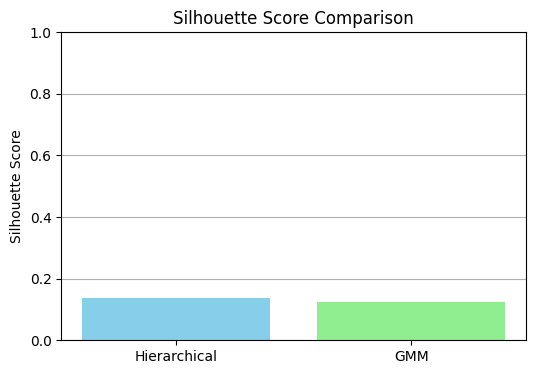

In [152]:
# Keep only original features for distance calculation
features = df.drop(columns=['Hierarchical_Cluster', 'GMM_Cluster'])

# Compute silhouette scores
silhouette_hierarchical = silhouette_score(features, df['Hierarchical_Cluster'])
silhouette_gmm = silhouette_score(features, df['GMM_Cluster'])

# Print the results
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.4f}")
print(f"Silhouette Score for GMM: {silhouette_gmm:.4f}")


#  Visualization: Bar plot comparison
plt.figure(figsize=(6, 4))
plt.bar(['Hierarchical', 'GMM'], [silhouette_hierarchical, silhouette_gmm], color=['skyblue', 'lightgreen'])
plt.title('Silhouette Score Comparison')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


BCubed Precision for GMM: 0.591
BCubed Recall for GMM: 0.555
BCubed Precision for Hierarchical Clustering: 0.416
BCubed Recall for Hierarchical Clustering: 0.423


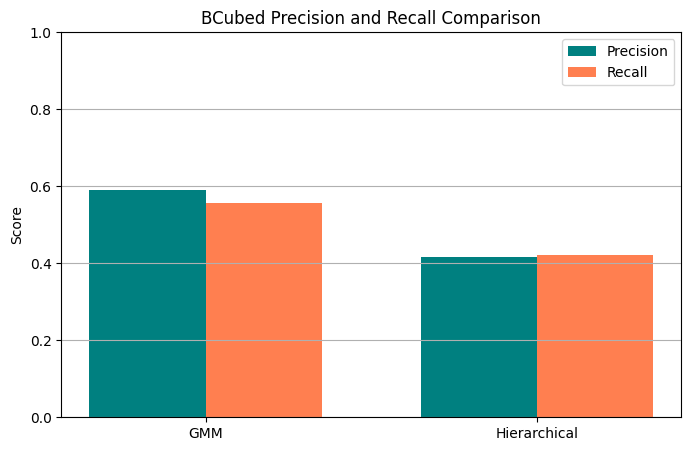

In [153]:
#  Custom function to compute BCubed Precision and Recall
def bcubed_precision_recall(y_true, y_pred):
    n = len(y_true)
    precisions = []
    recalls = []

    for i in range(n):
        same_cluster = [j for j in range(n) if y_pred[i] == y_pred[j]]  # All items in the same predicted cluster
        same_class = [j for j in range(n) if y_true[i] == y_true[j]]    # All items with the same actual label
        intersection = [j for j in same_cluster if y_true[i] == y_true[j]]  # Common elements

        precision_i = len(intersection) / len(same_cluster) if same_cluster else 0
        recall_i = len(intersection) / len(same_class) if same_class else 0

        precisions.append(precision_i)
        recalls.append(recall_i)

    return np.mean(precisions), np.mean(recalls)

#  Apply BCubed to GMM
y_true = df['Diet_Recommendation']
y_pred_gmm = df['GMM_Cluster']

precision_gmm, recall_gmm = bcubed_precision_recall(y_true, y_pred_gmm)
print(f"BCubed Precision for GMM: {precision_gmm:.3f}")
print(f"BCubed Recall for GMM: {recall_gmm:.3f}")

#  Apply BCubed to Hierarchical Clustering
y_pred_hier = df['Hierarchical_Cluster']

precision_hier, recall_hier = bcubed_precision_recall(y_true, y_pred_hier)
print(f"BCubed Precision for Hierarchical Clustering: {precision_hier:.3f}")
print(f"BCubed Recall for Hierarchical Clustering: {recall_hier:.3f}")

#  Visualization: Bar chart for BCubed metrics
labels = ['GMM', 'Hierarchical']
precisions = [precision_gmm, precision_hier]
recalls = [recall_gmm, recall_hier]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, precisions, width, label='Precision', color='teal')
plt.bar(x + width/2, recalls, width, label='Recall', color='coral')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('BCubed Precision and Recall Comparison')
plt.legend()
plt.grid(axis='y')
plt.show()


WCSS for Hierarchical Clustering: 4674.8983
WCSS for GMM Clustering: 5774.3805


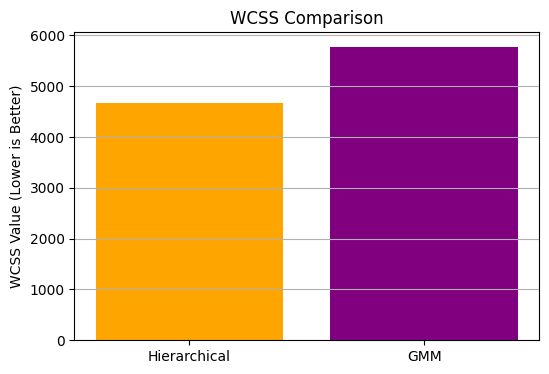

In [154]:
#  Function to compute WCSS (Within-Cluster Sum of Squares)
def compute_wcss(data, labels):
    unique_clusters = np.unique(labels)
    wcss = 0
    for cluster in unique_clusters:
        cluster_points = data[labels == cluster]  # Get all points in the cluster
        centroid = cluster_points.mean(axis=0)    # Compute the centroid
        wcss += np.sum((cluster_points - centroid) ** 2)  # Sum of squared distances
    return wcss

#  Compute WCSS for Hierarchical Clustering
wcss_hierarchical = compute_wcss(
    df.drop(columns=['Hierarchical_Cluster', 'GMM_Cluster']).values,
    df['Hierarchical_Cluster'].values
)

#  Compute WCSS for GMM
wcss_gmm = compute_wcss(
    df.drop(columns=['Hierarchical_Cluster', 'GMM_Cluster']).values,
    df['GMM_Cluster'].values
)

#  Print the results
print(f"WCSS for Hierarchical Clustering: {wcss_hierarchical:.4f}")
print(f"WCSS for GMM Clustering: {wcss_gmm:.4f}")

#  WCSS Bar Chart for Visual Comparison
plt.figure(figsize=(6, 4))
plt.bar(['Hierarchical', 'GMM'], [wcss_hierarchical, wcss_gmm], color=['orange', 'purple'])
plt.title('WCSS Comparison')
plt.ylabel('WCSS Value (Lower is Better)')
plt.grid(axis='y')
plt.show()


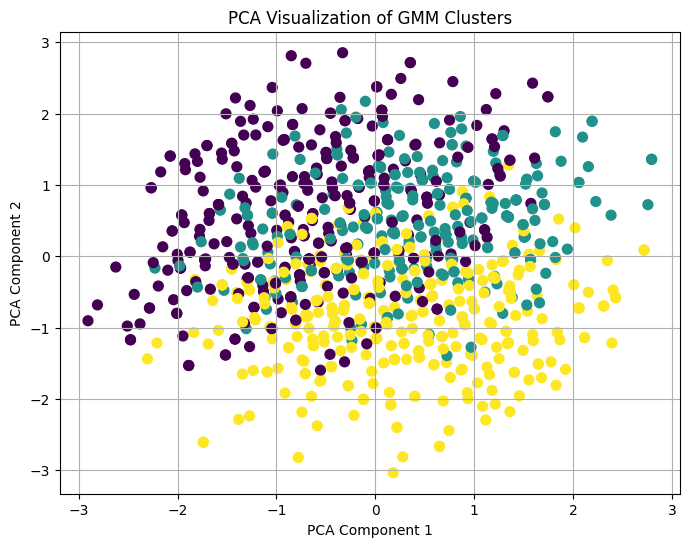

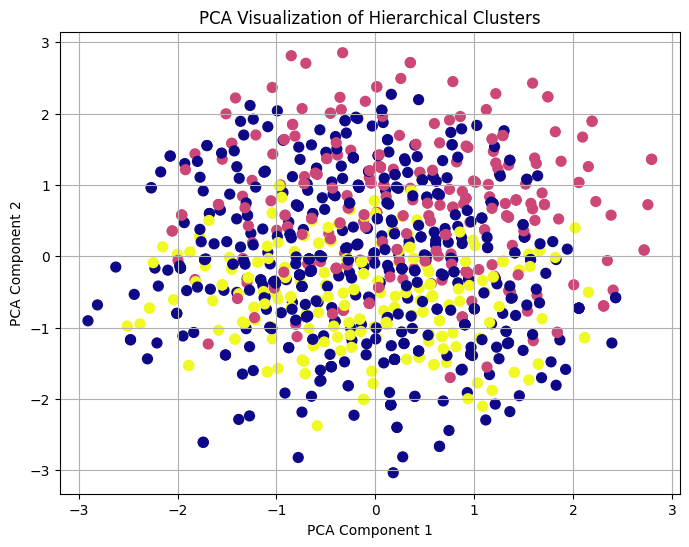

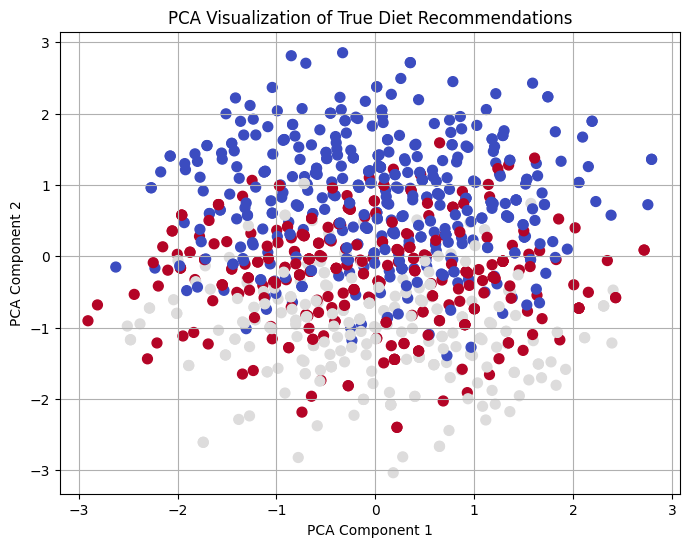

In [155]:
# Step 1: Select only the features (drop labels and clusters)
features = df.drop(columns=['Diet_Recommendation', 'GMM_Cluster', 'Hierarchical_Cluster'])

# Step 2: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# GMM
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['GMM_Cluster'], cmap='viridis', s=50)
plt.title('PCA Visualization of GMM Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# Hierarchical
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Hierarchical_Cluster'], cmap='plasma', s=50)
plt.title('PCA Visualization of Hierarchical Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# True Labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Diet_Recommendation'], cmap='coolwarm', s=50)
plt.title('PCA Visualization of True Diet Recommendations')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


\n SVM Model Performance (With GMM Cluster):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      0.69      0.82        52
           2       0.80      1.00      0.89        63

    accuracy                           0.92       200
   macro avg       0.93      0.90      0.90       200
weighted avg       0.94      0.92      0.92       200

Accuracy: 0.9200


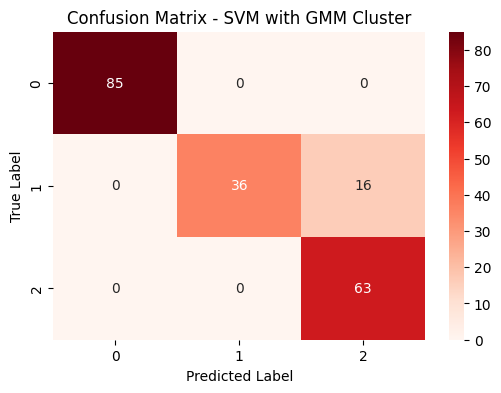

In [156]:
# Merge the full code blocks together into a single complete script


from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define new feature set with GMM_Cluster
feature_cols_with_gmm = [
    'Gender', 'Disease_Type', 'Physical_Activity_Level',
    'Age_Range', 'BMI_Range', 'Calorie_Range',
    'GMM_Cluster'  # added cluster feature
]
X_gmm = df[feature_cols_with_gmm]
y = df['Diet_Recommendation']

# Train/test split
X_train_gmm, X_test_gmm, y_train_gmm, y_test_gmm = train_test_split(
    X_gmm, y, test_size=0.2, random_state=1, stratify=y
)

# Retrain SVM on new features
svm_model_gmm = SVC(kernel='rbf', C=0.07, gamma="auto", random_state=42)
svm_model_gmm.fit(X_train_gmm, y_train_gmm)
y_pred_svm_gmm = svm_model_gmm.predict(X_test_gmm)

# Evaluate new SVM model
print("\\n SVM Model Performance (With GMM Cluster):")
print(classification_report(y_test_gmm, y_pred_svm_gmm))
print(f"Accuracy: {accuracy_score(y_test_gmm, y_pred_svm_gmm):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_gmm, y_pred_svm_gmm), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - SVM with GMM Cluster")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generative AI integration (Phase 4)


In [157]:
%pip install pandas scikit-learn ipywidgets
%pip install openai
%pip install python-dotenv



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:
# Import necessary libraries
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets for model evaluation
from sklearn.ensemble import RandomForestClassifier  # Implements the Random Forest algorithm for classification tasks
from sklearn.svm import SVC # Implements Support Vector Classification (SVM), a powerful machine learning algorithm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # Provides plotting functionality for data visualization 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import os 
from dotenv import load_dotenv 
from openai import OpenAI  
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display, HTML
import ipywidgets as widgets
import pandas as pd


# Import evaluation metrics:
# - accuracy_score: Measures the percentage of correctly classified samples.
# - classification_report: Provides precision, recall, F1-score, and support for each class.
# - confusion_matrix: Displays the number of correct and incorrect predictions for each class.


In [168]:
# Load the API key from the .env file 
load_dotenv()
api_key = os.getenv("OPNAI_API_KEY")
# Initialize OpenAI client 
client = OpenAI(api_key=api_key) 



In [169]:
# Load the preproccessting dataset
csv_path = "dataset_preprocessed (3).csv"  
df = pd.read_csv(csv_path)

# Define feature columns and target column
feature_cols = ['Gender', 'Disease_Type', 'Physical_Activity_Level', 'Age_Range', 'BMI_Range', 'Calorie_Range']
target_col = 'Diet_Recommendation'

# Select features and target
X = df[feature_cols]  
y = df[target_col]  


# Split the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=1, stratify=y
)



In [166]:
categorical_features = ['Gender', 'Disease_Type', 'Physical_Activity_Level', 'Age_Range', 'BMI_Range', 'Calorie_Range']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        kernel='rbf',
        C=0.07,
        gamma='auto',
        random_state=42
    ))
])

svm_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Disease_Type',
                                                   'Physical_Activity_Level',
                                                   'Age_Range', 'BMI_Range',
                                                   'Calorie_Range'])])),
                ('classifier', SVC(C=0.07, gamma='auto', random_state=42))])

In [ ]:
# Map for model output
diet_map = {0: 'Balanced', 1: 'Low Carb', 2: 'Low Sodium'}

# Feature columns
feature_cols = ['Gender', 'Disease_Type', 'Physical_Activity_Level', 'Age_Range', 'BMI_Range', 'Calorie_Range']

# Encoding for the model
label_encodings = {
    'Gender': {'Female': 0, 'Male': 1},
    'Disease_Type': {'None': 3, 'Diabetes': 0, 'Hypertension': 1, 'Obesity': 2},
    'Physical_Activity_Level': {'Sedentary': 2, 'Moderate': 1, 'Active': 0},
    'Age_Range': {'10-20': 0, '20-30': 1, '30-40': 2, '40-50': 3, '50-60': 4, '60-70': 5, '70-80': 6},
    'BMI_Range': {'10-20': 0, '20-30': 1, '30-40': 2, '40-50': 3},
    'Calorie_Range': {'1000-2000': 0, '2000-3000': 1, '3000-4000': 2}
}

# Dropdown widgets
dropdowns = {
    'Template': widgets.Dropdown(options=["dietary_advice", "meal_physical_plan"], description="Template:", value="dietary_advice"),
    'Gender': widgets.Dropdown(options=['Female', 'Male'], description='Gender'),
    'Disease_Type': widgets.Dropdown(options=['None', 'Diabetes', 'Hypertension', 'Obesity'], description='Disease'),
    'Physical_Activity_Level': widgets.Dropdown(options=['Sedentary', 'Moderate', 'Active'], description='Activity'),
    'Age_Range': widgets.Dropdown(options=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'], description='Age'),
    'BMI_Range': widgets.Dropdown(options=['10-20', '20-30', '30-40', '40-50'], description='BMI'),
    'Calorie_Range': widgets.Dropdown(options=['1000-2000', '2000-3000', '3000-4000'], description='Calories'),
}

submit_button = widgets.Button(description="Submit")
output = widgets.Output()

# GPT explanation function
def gpt_explain_diet(symptom_features, predicted_class, template_type):
    prompt = (
        f"A user has the following profile:\n"
        f"- Gender: {symptom_features['Gender']}\n"
        f"- Disease Type: {symptom_features['Disease_Type']}\n"
        f"- Physical Activity Level: {symptom_features['Physical_Activity_Level']}\n"
        f"- Age Range: {symptom_features['Age_Range']}\n"
        f"- BMI Range: {symptom_features['BMI_Range']}\n"
        f"- Calorie Intake Range: {symptom_features['Calorie_Range']}\n\n"
        f"The predicted diet recommendation is plan #{predicted_class} ({diet_map[predicted_class]}).\n"
    )
    if template_type == "dietary advice":
        prompt += f"Please explain why this plan is appropriate and give helpful dietary advice."
    elif template_type == "meal_physical_plan9o":
        prompt += f"Please Provide a detailed 1-day meal plan and physical activity plan for this user."
    
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a nutritionist assistant providing helpful advice."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.7,
            max_tokens=400
        )
        return response.choices[0].message.content
    except Exception as e:
        return f" GPT Error: {e}"

# Submit button logic
def on_submit(change):
    # Get the selected template
    selected_template = dropdowns['Template'].value
    
    # Get user input (excluding the template dropdown)
    user_input = {col: dropdowns[col].value for col in feature_cols}  # readable
    encoded_input = {col: label_encodings[col][val] for col, val in user_input.items()}  # encoded
    encoded_df = pd.DataFrame([encoded_input])

    prediction = svm_pipeline.predict(encoded_df)[0]  # Model prediction

    # Get GPT advice based on readable user input and selected template
    gpt_response = gpt_explain_diet(user_input, prediction, selected_template)

    output.clear_output()
    with output:
        display(HTML(f"<h3 style='color: green;'>Predicted Diet Recommendation: {diet_map[prediction]}</h3>"))
        display(HTML(f"<p><strong>GPT Advice ({selected_template}):</strong><br>{gpt_response}</p>"))

# Button action
submit_button.on_click(on_submit)

# Display UI
print("Fill in your details and click Submit:")
display(*(dropdowns.values()), submit_button, output)

Fill in your details and click Submit:


Dropdown(description='Template:', options=('dietary_advice', 'meal_physical_plan'), value='dietary_advice')

Dropdown(description='Gender', options=('Female', 'Male'), value='Female')

Dropdown(description='Disease', options=('None', 'Diabetes', 'Hypertension', 'Obesity'), value='None')

Dropdown(description='Activity', options=('Sedentary', 'Moderate', 'Active'), value='Sedentary')

Dropdown(description='Age', options=('10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'), value='10…

Dropdown(description='BMI', options=('10-20', '20-30', '30-40', '40-50'), value='10-20')

Dropdown(description='Calories', options=('1000-2000', '2000-3000', '3000-4000'), value='1000-2000')

Button(description='Submit', style=ButtonStyle())

Output()

In [163]:
# Data table with justifications based on actual outputs
data = {
    "Criteria": [
        "Text of Prompt",
        "Tone",
        "Clarity of Structure",
        "Level of Detail",
        "AI Guidance Strength"
    ],
    "Template 1: dietary_advice": [
        "Prompt asks GPT to explain why the prediction is suitable and give general dietary advice. It leads to an informative, advisory output with flexible content.",
        "The tone is friendly and supportive — it speaks directly to the user with empathy and general tips.",
        "Structure flows like an article: 7 numbered points but without strict segmentation for meal/activity types.",
        "Covers general nutritional advice like avoiding sugar and staying hydrated, but no specific meals or schedules.",
        "Because the prompt is open-ended, GPT produces varied results depending on context — flexible but less controlled."
    ],
    "Template 2: meal_physical_plan": [
        "Prompt is specific — it asks for a 1-day plan including meals and activities, pushing GPT to output structured content.",
        "The tone is professional and direct — it sounds like a written plan by a clinical nutritionist.",
        "Very structured: clear enumeration (1–6) with distinct focus areas like breakfast/lunch/portion sizes/monitoring.",
        "Gives specific food types (e.g., poultry, tofu, legumes), activity types, hydration goals, and diabetes-specific actions.",
        "Prompt gives GPT strong direction — outputs are consistent, clearly segmented, and aligned with real health planning."
    ]
}
# Set display option to show full column content
pd.set_option('display.max_colwidth', None)


# Display as pandas DataFrame
df_output_based = pd.DataFrame(data)
df_output_based  # This will still display the table normally, just without styling



Criteria  \
0        Text of Prompt   
1                  Tone   
2  Clarity of Structure   
3       Level of Detail   
4  AI Guidance Strength   

                                                                                                                                      Template 1: dietary_advice  \
0  Prompt asks GPT to explain why the prediction is suitable and give general dietary advice. It leads to an informative, advisory output with flexible content.   
1                                                            The tone is friendly and supportive — it speaks directly to the user with empathy and general tips.   
2                                                    Structure flows like an article: 7 numbered points but without strict segmentation for meal/activity types.   
3                                                Covers general nutritional advice like avoiding sugar and staying hydrated, but no specific meals or schedules.   
4                                             Because the prompt is open-ended, GPT produces varied results depending on context — flexible but less controlled.   

                                                                                              Template 2: meal_physical_plan  
0    Prompt is specific — it asks for a 1-day plan including meals and activities, pushing GPT to output structured content.  
1                            The tone is professional and direct — it sounds like a written plan by a clinical nutritionist.  
2          Very structured: clear enumeration (1–6) with distinct focus areas like breakfast/lunch/portion sizes/monitoring.  
3  Gives specific food types (e.g., poultry, tofu, legumes), activity types, hydration goals, and diabetes-specific actions.  
4      Prompt gives GPT strong direction — outputs are consistent, clearly segmented, and aligned with real health planning.